Описание в data/w3_08_statement-logistic.pdf

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_answer(name, value):
    with open('data/statement-logistic_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [3]:
df = pd.read_csv('data/data-logistic.csv', header=None)

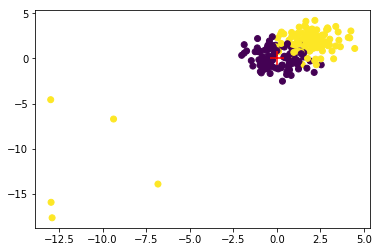

In [4]:
plt.scatter(df[1], df[2], c=df[0])
plt.scatter(0, 0, c='red', marker='+', s=200)

In [5]:
class GradientDescent:
    def __init__(self, initial_weights, tol=1e-5, n_iter=10**4, learning_rate=0.1):
        self.tol = tol
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.initial_weights = initial_weights
        self.coef = None
        
    def optimize(self, func, gfunc):
        w = np.array(self.initial_weights)
        self.num_iter = 1
        while self.num_iter <= self.n_iter:
            w_new = w - self.learning_rate * np.array(gfunc(w))
            eps = np.linalg.norm(w-w_new)
            w = w_new
            if eps >= self.tol:
                self.num_iter += 1
            else:
                self.coef = w
                break
        self.coef = w
        
    def report(self):
        print(self.num_iter)

In [6]:
class LogisticRegression:
    def __init__(self, initial_weights, C=1.0, tol=1e-5, n_iter=10**4, learning_rate=0.1):
        self.C = C
        self.tol = tol
        self.n_iter = n_iter
        self.learning_rate = learning_rate
        self.solver = GradientDescent(tol = self.tol, 
                                      n_iter = self.n_iter, 
                                      learning_rate = self.learning_rate,
                                      initial_weights = initial_weights)
        self.coef = None
    
    def __func(self, w, X, y):
        return np.mean(np.log(1 + np.exp(-X.dot(w)*y))) + (1/2)*self.C*np.sum(w**2)
    
    def __gfunc(self, w, X, y):
        return -np.mean(X*((1 - 1/(1 + np.exp(-X.dot(w)*y)))*y).reshape(X.shape[0],1), axis=0) + self.C*w
    
    def fit(self, X, y):
        self.solver.optimize(lambda w: self.__func(w, X=X, y=y), lambda w: self.__gfunc(w, X=X, y=y))
        self.coef = self.solver.coef
        
    def predict_proba(self, X):
        w = self.coef
        return 1/(1 + np.exp(-X.dot(w)))

In [7]:
X = df[[1, 2]].values
y = df[0].values

In [8]:
def line_fun(x):
    return -clf.coef[0]/clf.coef[1]*x

[ 0.28781162  0.0919833 ]
0.926857142857


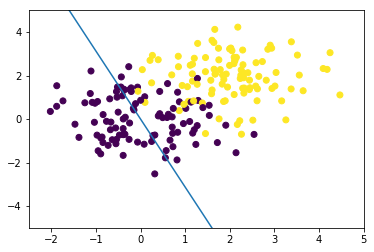

In [9]:
clf = LogisticRegression((0,0), C = 0)
clf.fit(X, y)
print(clf.coef)
score0 = roc_auc_score(y, clf.predict_proba(X))
print(roc_auc_score(y, clf.predict_proba(X)))

plt.xlim((-2.5, 5))
plt.ylim((-5, 5))
plt.scatter(df[1], df[2], c=df[0])
#plt.scatter(0, 0, c='red', marker='+', s=200)
plt.plot(np.linspace(-2.5, 5, 100), list(map( line_fun, np.linspace(-2.5, 5, 100))))

[ 0.02855875  0.02478014]
0.936285714286


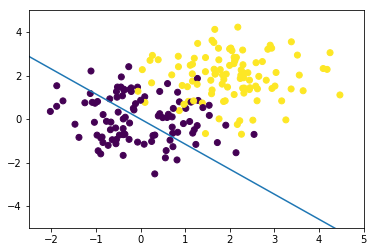

In [10]:
clf = LogisticRegression((0,0), C = 10)
clf.fit(X, y)
print(clf.coef)
score1 = roc_auc_score(y, clf.predict_proba(X))
print(roc_auc_score(y, clf.predict_proba(X)))

plt.xlim((-2.5, 5))
plt.ylim((-5, 5))
plt.scatter(df[1], df[2], c=df[0])
#plt.scatter(0, 0, c='red', marker='+', s=200)
plt.plot(np.linspace(-2.5, 5, 100), list(map( line_fun, np.linspace(-2.5, 5, 100))))

In [11]:
answer = ' '.join([str(round(el,3)) for el in [score0, score1]])

answer

'0.927 0.936'

In [12]:
save_answer('1', answer)

____

[ 0.02855875  0.02478014]
0.936285714286
8


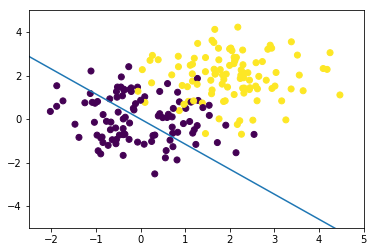

In [13]:
clf = LogisticRegression((0,0), C = 10)
clf.fit(X, y)
print(clf.coef)
score1 = roc_auc_score(y, clf.predict_proba(X))
print(roc_auc_score(y, clf.predict_proba(X)))

plt.xlim((-2.5, 5))
plt.ylim((-5, 5))
plt.scatter(df[1], df[2], c=df[0])
#plt.scatter(0, 0, c='red', marker='+', s=200)
plt.plot(np.linspace(-2.5, 5, 100), list(map( line_fun, np.linspace(-2.5, 5, 100))))
clf.solver.report()

In [22]:
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1, 2, 5, 10, 100, 1000]

In [23]:
iters = []
for learning_rate in learning_rates:
    clf = LogisticRegression((0,0), C = 1, learning_rate=learning_rate)
    clf.fit(X, y)
    iters.append(clf.solver.num_iter)

C:\Users\dac\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp
C:\Users\dac\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in multiply
  del sys.path[0]


In [25]:
iters

[1, 4845, 1427, 283, 45, 10001, 10001, 514, 325, 156, 104]

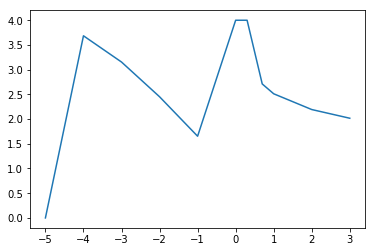

In [24]:
plt.plot(np.log10(learning_rates), np.log10(iters))

In [29]:
for w in [(0,0), (10,10), (-10,10), (-10,-10), (10,-10), (10,0), (0,10), (-10,0), (0,-10), (23, -78)]:
    clf = LogisticRegression((0,0), C = 10)
    clf.fit(X, y)

    print(roc_auc_score(y, clf.predict_proba(X)), clf.solver.num_iter)

0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
0.936285714286 8
